<a href="https://colab.research.google.com/github/Hedriss10/BotTrading-Quantil/blob/master/Quantil_MLops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance 

In [51]:
#Importando as libs
import yfinance as yf
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight

In [25]:
#DataFrame 
df = yf.download("^GSPC", start='2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [26]:
#Amostragem
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [27]:
df['ret'] = df.Close.pct_change()

In [31]:
df

,Open,High,Low,Close,Adj Close,Volume,ret
Date,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,NaN
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003116
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000546
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.004001
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882
...,...,...,...,...,...,...,...
2023-03-22,4002.040039,4039.489990,3936.169922,3936.969971,3936.969971,4533010000,-0.016463
2023-03-23,3959.209961,4007.659912,3919.050049,3948.719971,3948.719971,4991600000,0.002985
2023-03-24,3939.209961,3972.739990,3909.159912,3970.989990,3970.989990,4583970000,0.005640


In [35]:
#Iteração para mudanças de preços relativos
def lagit(df, langs):
  for i in range(1, langs+1):
    df['Lang_'+str(i)] = df['ret'].shift(i)
  return ['Lang_'+str(i) for i in range(1, langs+1)]

In [36]:
#Retornando uma lista para dois parametros
lagit(df, 2)

['Lang_1', 'Lang_2']

In [37]:
df

,Open,High,Low,Close,Adj Close,Volume,ret,Lang_1,Lang_2
Date,,,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,NaN,NaN,NaN
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003116,NaN,NaN
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000546,0.003116,NaN
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.004001,0.000546,0.003116
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,0.004001,0.000546
...,...,...,...,...,...,...,...,...,...
2023-03-22,4002.040039,4039.489990,3936.169922,3936.969971,3936.969971,4533010000,-0.016463,0.012982,0.008918
2023-03-23,3959.209961,4007.659912,3919.050049,3948.719971,3948.719971,4991600000,0.002985,-0.016463,0.012982
2023-03-24,3939.209961,3972.739990,3909.159912,3970.989990,3970.989990,4583970000,0.005640,0.002985,-0.016463


In [38]:
#Filtrando retornos positivos e negativos da em base da coluna ret
"""
  base em estudos profundos, temos que tomar muito cuidado ao escolher a forma
  logística para entender os hiperparâmetros, 0 indo para shel e 1 para buy
"""
df['direction'] = np.where(df.ret > 0, 1, 0)

In [39]:
df

,Open,High,Low,Close,Adj Close,Volume,ret,Lang_1,Lang_2,direction
Date,,,,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,NaN,NaN,NaN,0
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003116,NaN,NaN,1
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000546,0.003116,NaN,1
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.004001,0.000546,0.003116,1
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,0.004001,0.000546,1
...,...,...,...,...,...,...,...,...,...,...
2023-03-22,4002.040039,4039.489990,3936.169922,3936.969971,3936.969971,4533010000,-0.016463,0.012982,0.008918,0
2023-03-23,3959.209961,4007.659912,3919.050049,3948.719971,3948.719971,4991600000,0.002985,-0.016463,0.012982,1
2023-03-24,3939.209961,3972.739990,3909.159912,3970.989990,3970.989990,4583970000,0.005640,0.002985,-0.016463,1


In [41]:
#Filtragem 
df.direction.value_counts()

1    1805
0    1526
Name: direction, dtype: int64

In [42]:
#Fazendo as features
features = lagit(df, 3)

In [43]:
#Verificando a lista dos 3 dias
features

['Lang_1', 'Lang_2', 'Lang_3']

In [45]:
#Apagando valores "NAN"
df.dropna(inplace=True)

In [46]:
#Amostragem
df[features]

,Lang_1,Lang_2,Lang_3
Date,,,
2010-01-08,0.004001,0.000546,0.003116
2010-01-11,0.002882,0.004001,0.000546
2010-01-12,0.001747,0.002882,0.004001
2010-01-13,-0.009381,0.001747,0.002882
2010-01-14,0.008326,-0.009381,0.001747
...,...,...,...
2023-03-22,0.012982,0.008918,-0.011019
2023-03-23,-0.016463,0.012982,0.008918
2023-03-24,0.002985,-0.016463,0.012982


In [47]:
df

,Open,High,Low,Close,Adj Close,Volume,ret,Lang_1,Lang_2,direction,Lang_3
Date,,,,,,,,,,,
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,0.004001,0.000546,1,0.003116
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000,0.001747,0.002882,0.004001,1,0.000546
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000,-0.009381,0.001747,0.002882,0,0.004001
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000,0.008326,-0.009381,0.001747,1,0.002882
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000,0.002426,0.008326,-0.009381,1,0.001747
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-22,4002.040039,4039.489990,3936.169922,3936.969971,3936.969971,4533010000,-0.016463,0.012982,0.008918,0,-0.011019
2023-03-23,3959.209961,4007.659912,3919.050049,3948.719971,3948.719971,4991600000,0.002985,-0.016463,0.012982,1,0.008918
2023-03-24,3939.209961,3972.739990,3909.159912,3970.989990,3970.989990,4583970000,0.005640,0.002985,-0.016463,1,0.012982


**Começando o modelo de Regressão Logística**

In [50]:
#Equal X e y
X = df[features]
y = df['direction']

In [54]:
#Model Balance
model = LogisticRegression(class_weight="balanced")

In [55]:
model.fit(X, y)

LogisticRegression(class_weight='balanced')

**Análise de predição futura**

In [67]:
#Modelo preditivo
df['predciton_LR'] = model.predict(X)

In [65]:
df.drop('predciton_Lr', axis=1, inplace=True)

In [68]:
df

,Open,High,Low,Close,Adj Close,Volume,ret,Lang_1,Lang_2,direction,Lang_3,predciton_LR
Date,,,,,,,,,,,,
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,0.004001,0.000546,1,0.003116,0
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000,0.001747,0.002882,0.004001,1,0.000546,0
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000,-0.009381,0.001747,0.002882,0,0.004001,0
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000,0.008326,-0.009381,0.001747,1,0.002882,1
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000,0.002426,0.008326,-0.009381,1,0.001747,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-22,4002.040039,4039.489990,3936.169922,3936.969971,3936.969971,4533010000,-0.016463,0.012982,0.008918,0,-0.011019,0
2023-03-23,3959.209961,4007.659912,3919.050049,3948.719971,3948.719971,4991600000,0.002985,-0.016463,0.012982,1,0.008918,1
2023-03-24,3939.209961,3972.739990,3909.159912,3970.989990,3970.989990,4583970000,0.005640,0.002985,-0.016463,1,0.012982,0


*No resultado já identificamos um problema de decisão para análise futura ao saber comprar e vender.*

**Coluna ['direction']** <br>
Em base que 1 seja = Buy <br> 
Em base que 0 seja = Shel <br>

**Coluna ['predction']** <br>
Em base que 1 seja = Buy <br>
Em base que 0 seja = Shel <br>

In [69]:
df['start'] = df['predciton_LR'] * df.ret

In [70]:
df

,Open,High,Low,Close,Adj Close,Volume,ret,Lang_1,Lang_2,direction,Lang_3,predciton_LR,start
Date,,,,,,,,,,,,,
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882,0.004001,0.000546,1,0.003116,0,0.000000
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000,0.001747,0.002882,0.004001,1,0.000546,0,0.000000
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000,-0.009381,0.001747,0.002882,0,0.004001,0,-0.000000
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000,0.008326,-0.009381,0.001747,1,0.002882,1,0.008326
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000,0.002426,0.008326,-0.009381,1,0.001747,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-22,4002.040039,4039.489990,3936.169922,3936.969971,3936.969971,4533010000,-0.016463,0.012982,0.008918,0,-0.011019,0,-0.000000
2023-03-23,3959.209961,4007.659912,3919.050049,3948.719971,3948.719971,4991600000,0.002985,-0.016463,0.012982,1,0.008918,1,0.002985
2023-03-24,3939.209961,3972.739990,3909.159912,3970.989990,3970.989990,4583970000,0.005640,0.002985,-0.016463,1,0.012982,0,0.000000


In [76]:
"""
Valiação do acúmulos de retornos do ativos, e somente os acúmulos 
do modelos investidos 
"""
(df[['start', 'ret']] + 1).cumprod() -1 

,start,ret
Date,,
2010-01-08,0.000000,0.002882
2010-01-11,0.000000,0.004634
2010-01-12,0.000000,-0.004791
2010-01-13,0.008326,0.003495
2010-01-14,0.008326,0.005930
...,...,...
2023-03-22,3.826191,2.448371
2023-03-23,3.840594,2.458662
2023-03-24,3.840594,2.478168


<Axes: xlabel='Date'>

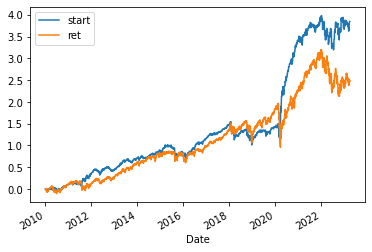

In [77]:
((df[['start', 'ret']] + 1).cumprod() -1 ).plot()

**Train test split**
---
*Separando dados de teste e treino para melhorar o aprendizado de máquina*

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [84]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [85]:
X_test['predciton_LR'] = model.predict(X_test)

In [88]:
X_test['ret'] = df.ret[X_test.index[0]:]
X_test

,Lang_1,Lang_2,Lang_3,predciton_LR,ret
Date,,,,,
2019-04-10,-0.006067,0.001047,0.004636,1,0.003478
2019-04-11,0.003478,-0.006067,0.001047,0,0.000038
2019-04-12,0.000038,0.003478,-0.006067,1,0.006609
2019-04-15,0.006609,0.000038,0.003478,0,-0.000629
2019-04-16,-0.000629,0.006609,0.000038,1,0.000509
...,...,...,...,...,...
2023-03-22,0.012982,0.008918,-0.011019,0,-0.016463
2023-03-23,-0.016463,0.012982,0.008918,1,0.002985
2023-03-24,0.002985,-0.016463,0.012982,0,0.005640


In [96]:
X_test['start'] = X_test['predciton_LR'] * X_test['ret']
(X_test[['start', 'ret']] + 1).cumprod() - 1

,start,ret
Date,,
2019-04-10,0.003478,0.003478
2019-04-11,0.003478,0.003516
2019-04-12,0.010110,0.010149
2019-04-15,0.010110,0.009513
2019-04-16,0.010625,0.010027
...,...,...
2023-03-22,1.136941,0.367858
2023-03-23,1.143318,0.371941
2023-03-24,1.143318,0.379678


In [98]:
X_test

,Lang_1,Lang_2,Lang_3,predciton_LR,ret,start
Date,,,,,,
2019-04-10,-0.006067,0.001047,0.004636,1,0.003478,0.003478
2019-04-11,0.003478,-0.006067,0.001047,0,0.000038,0.000000
2019-04-12,0.000038,0.003478,-0.006067,1,0.006609,0.006609
2019-04-15,0.006609,0.000038,0.003478,0,-0.000629,-0.000000
2019-04-16,-0.000629,0.006609,0.000038,1,0.000509,0.000509
...,...,...,...,...,...,...
2023-03-22,0.012982,0.008918,-0.011019,0,-0.016463,-0.000000
2023-03-23,-0.016463,0.012982,0.008918,1,0.002985,0.002985
2023-03-24,0.002985,-0.016463,0.012982,0,0.005640,0.000000


<Axes: xlabel='Date'>

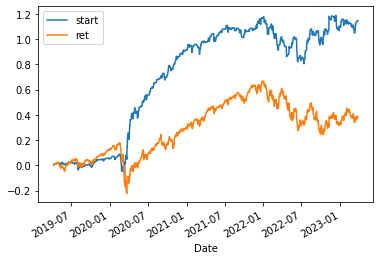

In [95]:
((X_test[['start', 'ret']] + 1).cumprod() - 1).plot() 